In [ ]:
import sys
sys.path.append("../")
from  core.model_structure import *
from core.MLp_layer import Layer
from utils.activations import *
import torch
from CNN.Vectorised_Cnn_operations import *
from CNN.Vectorised_Cnn_operations.Vec_cnn_Layers import *
from CNN.Loop_based_cnn.Cnn_layers import *
from core.Droupout_layer import Droupout_layer

In [8]:
def generate_mini_mnist(num_samples=1000, img_size=5, num_classes=5):
    X = torch.zeros(num_samples, 1, img_size, img_size)
    y = torch.randint(0, num_classes, (num_samples, 1))

    for i in range(num_samples):
        label = y[i].item()
        if label == 0:
            X[i, 0, 1:4, 2] = 1  # barre verticale
        elif label == 1:
            X[i, 0, 2, 1:4] = 1  # barre horizontale
        elif label == 2:
            X[i, 0, 1:4, 1:4] = 1  # carré plein
        elif label == 3:
            X[i, 0, 0:5, 0:5] = torch.eye(5)  # diagonale
        elif label == 4:
            X[i, 0, 2, 2] = 1  # point central

    return X, y

# Exemple d'utilisation :
X_train, y_train = generate_mini_mnist(50, 5, 5)
X_test, y_test = generate_mini_mnist(10, 5, 5)



y_test.unique()

tensor([0, 1, 3, 4])

In [9]:
x_indices=torch.unique(y_test)
formes=X_test[x_indices]

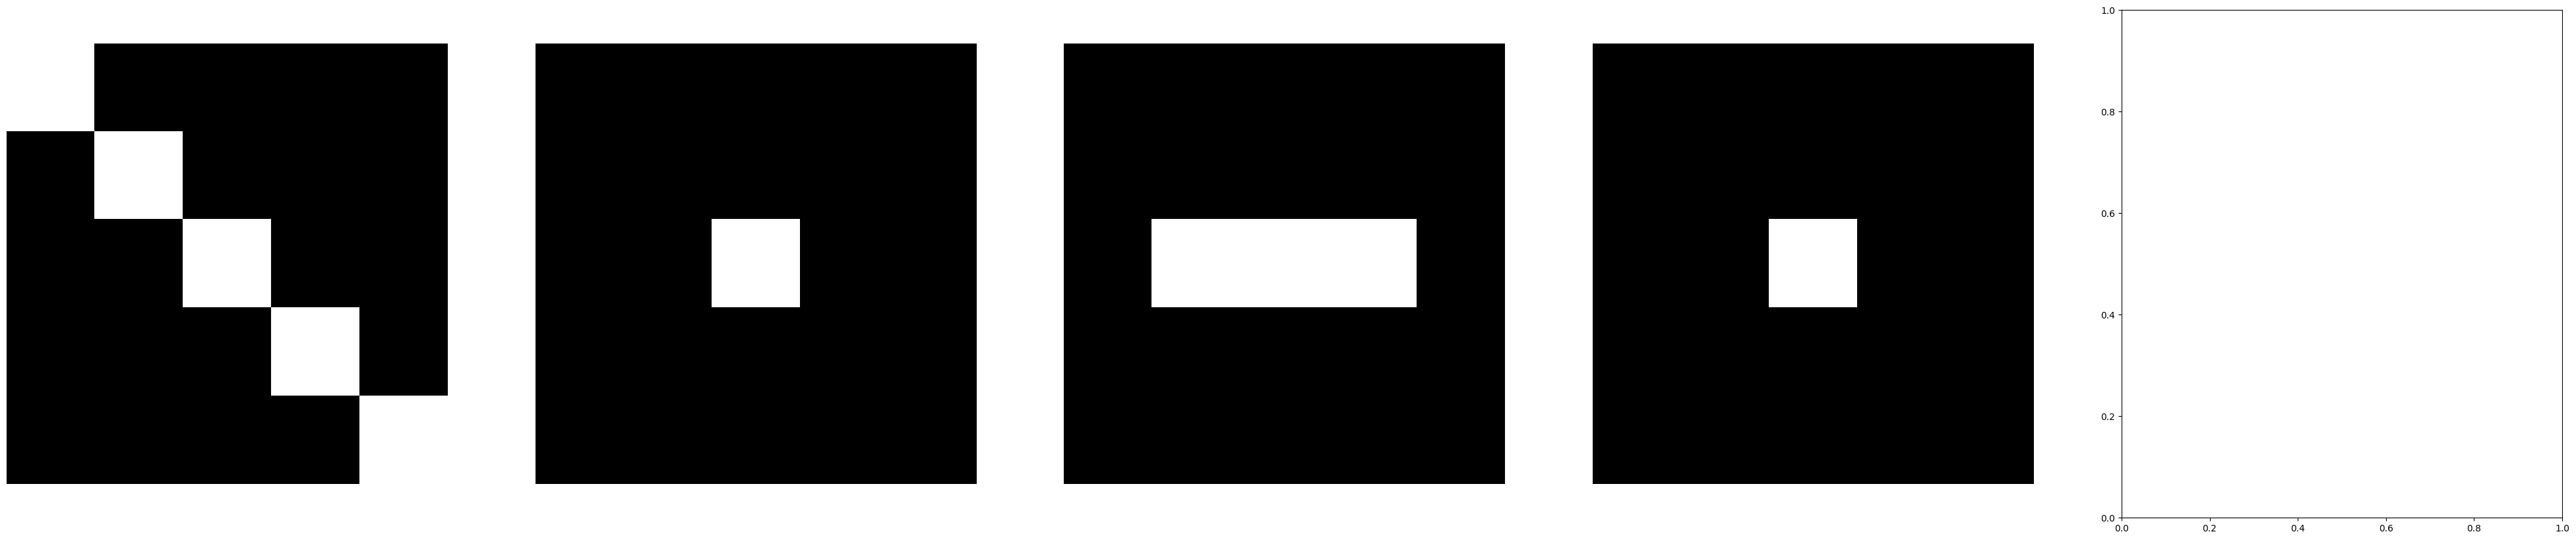

In [10]:


import torch
import matplotlib.pyplot as plt

fig,axes=plt.subplots(1,5,figsize=(50,10))
for i,f in enumerate(formes):
 img = f.squeeze(0).numpy() # (5, 5)
 axes[i].imshow(img, cmap='gray')
 axes[i].axis('off')


In [11]:
y_test=torch.eye(5)[y_test.long()].squeeze(1)
y_train=torch.eye(5)[y_train.long()].squeeze(1)

In [12]:
test_model=Deep_learning_Model(
        "adam","Crossentropy"
)

test_model.add_layers([
    vec_Conv2D_layer(1, 16, (3, 3), padding=1, stride=1, initializer="HeNormal"),
    Batch_norm_layer(16),
    LeakyRelu(0.01),
    
    

    vec_Conv2D_layer(16, 32, (3, 3), padding=1, stride=1, initializer="HeNormal"),
    Batch_norm_layer(32),
    LeakyRelu(0.01),
    

    Vec_Max_pool_layer(size=(2, 2), stride=1),  # Réduction spatiale ici

    Flatten_layer(),

    Layer(512, 64, initializer="HeNormal"),
    LeakyRelu(0.01),

    Layer(64, 5, initializer="HeNormal"),
])
train_losses,val_losses,accs,val_accs=test_model.minibatch_SGD_train(10,X_train,y_train,X_test,y_test,batch_size=10,learning_rate=0.001,accuracy=True)


1 | Train Loss: 0.5563 | Val Loss: 0.3203 | Train Acc: 0.00% | Val Acc: 30.00%
2 | Train Loss: 0.3645 | Val Loss: 0.2169 | Train Acc: 42.00% | Val Acc: 30.00%
3 | Train Loss: 0.2402 | Val Loss: 0.1423 | Train Acc: 48.00% | Val Acc: 100.00%
4 | Train Loss: 0.1543 | Val Loss: 0.0984 | Train Acc: 100.00% | Val Acc: 100.00%
5 | Train Loss: 0.1093 | Val Loss: 0.0698 | Train Acc: 100.00% | Val Acc: 100.00%
6 | Train Loss: 0.0728 | Val Loss: 0.0497 | Train Acc: 100.00% | Val Acc: 100.00%
7 | Train Loss: 0.0487 | Val Loss: 0.0352 | Train Acc: 100.00% | Val Acc: 100.00%
8 | Train Loss: 0.0344 | Val Loss: 0.0259 | Train Acc: 100.00% | Val Acc: 100.00%
9 | Train Loss: 0.0252 | Val Loss: 0.0198 | Train Acc: 100.00% | Val Acc: 100.00%
10 | Train Loss: 0.0216 | Val Loss: 0.0149 | Train Acc: 100.00% | Val Acc: 100.00%


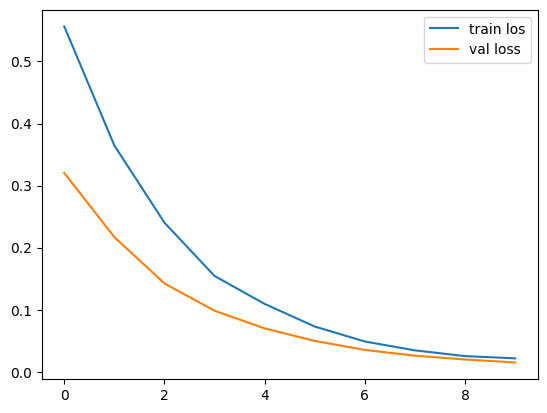

In [15]:
import matplotlib.pyplot as plt
plt.plot(range(10),train_losses,label="train los")
plt.plot(range(10),val_losses,label="val loss")
plt.legend()

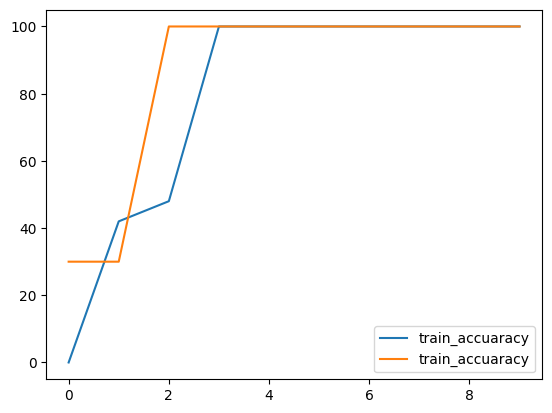

In [16]:
plt.plot(range(10),accs,label="train_accuaracy")
plt.plot(range(10),val_accs,label="train_accuaracy")
plt.legend()